# International Debt

In [2]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import wbgapi as wb
from notion_client import APIResponseError
import seaborn as sns

Get the indicators and values for all the countries using the workd bank api

In [3]:
# GNI per capita year on year (%) = NY.GNP.PCAP.KD.ZG
# GDP growth year on year (%) = NY.GDP.MKTP.KD.ZG
# GDP per capita (current US$) = NY.GDP.PCAP.CD

# Functions to get indicator data for a country and to return it in formatted JSON
def get_indicator_list(indicator,country_code):
    indicator_list = {}
    try:
        for row in wb.data.fetch(indicator, country_code): # all years
            year = row['time'][2:]
            if(int(year) > 2020 or int(year) < 2000): continue
            if row['value'] != None:
                indicator_list[row['time'][2:]] = row['value']
            else:
                indicator_list[row['time'][2:]] = np.nan
    except APIResponseError as err:
        print(f"An APIRespsonse error occured with {country_code} : {err}")
    except Exception as err:
        print(f"An unexpected error occured: {err}")

    return indicator_list

def get_indicatiors_for_country(country_code):
    indicators_data = {'GNI per capita year on year (%)': get_indicator_list('NY.GNP.PCAP.KD.ZG',country_code),
                       'GDP growth year on year (%)': get_indicator_list('NY.GDP.MKTP.KD.ZG',country_code),
                       'GDP per capita (current US$)': get_indicator_list('NY.GDP.PCAP.CD',country_code)}
    return indicators_data


In [4]:
# Get all the country codes for all the countries
with open(f'./IDS_ALLCountries_Data.json') as f:
    data = json.load(f)
country_codes = []
for i in data:
    country_code = i['Country Code']
    if country_code in country_codes or country_code == '' : continue
    country_codes.append(country_code)

In [5]:
# Send all the countries indicator data to the directory 'indicators_for_countries_data' as json.
for country_code in country_codes:
    indicator_json = {country_code: get_indicatiors_for_country(country_code)}
    with open(f"indicators_for_countries_data/{country_code}_indicators", "w") as outfile:
        json.dump(indicator_json, outfile)


In [18]:
# Functions to get indicator data for all the countries in the dataset

# Sorts indicator data into dictionaries given a countries code
def get_indicator_data_ready(country_code):
    
    # 
    with open(f"./indicators_for_countries_data/{country_code}_indicators") as f:
        json_indicators = json.load(f)
    
    country_ind_data = {}

    for data_category in json_indicators:
        country_ind_data['country_indicator'] = data_category
        value_of_current_category = json_indicators[data_category]

        print(country_ind_data)
        print(value_of_current_category)

        for category in value_of_current_category:
            category_arr = []
            individual_data = value_of_current_category[category]
        
            for years in individual_data:
                value = individual_data[years]
                category_arr.append(value)
            country_ind_data[category] = category_arr

    return country_ind_data

def get_incicator_table(year):

    data_array = []
    column_names = []

    for i in get_indicator_data_ready('SDN'):
        if i == 'country_indicator': continue
        temp_data_array = []

        for individual_country_code in country_codes:
            data = get_indicator_data_ready(individual_country_code)
            temp_data_array.append(data[i][year-2000])

        data_array.append(temp_data_array)
        column_names.append(i)

    df_ind = pd.DataFrame(np.array(data_array),index=column_names,columns=country_codes).T

    return df_ind

df_indicators = get_incicator_table(2002)

# Prints out the data of indicators for all countries in the specified dataset in 2002
df_indicators

{'country_indicator': 'SDN'}
{'GNI per capita year on year (%)': {'2020': -7.12980803558578, '2019': -4.32042503363915, '2018': -7.04780194913664, '2017': -4.59508300709061, '2016': 0.410462794928534, '2015': -1.59592527435996, '2014': 6.71934422259208, '2013': -1.67856832731331, '2012': -4.03266446520895, '2011': 7.48252046637241, '2010': -4.79501428714468, '2009': -2.78833714663892, '2008': -0.459336590526263, '2007': 2.97432259777881, '2006': 2.46074013831741, '2005': 3.04282161001892, '2004': 1.67399056902029, '2003': 3.8091476457287, '2002': 2.43102954626156, '2001': 4.27138541695362, '2000': 2.74185680210147}, 'GDP growth year on year (%)': {'2020': -3.62980082410752, '2019': -2.17825104530091, '2018': -2.6809305497999, '2017': 0.70925628476644, '2016': 3.46764218409288, '2015': 1.91017689052751, '2014': 4.66137954229873, '2013': 1.95514463302422, '2012': -17.0046884048945, '2011': -3.21353209253371, '2010': 3.85824195230107, '2009': -2.76770436599138, '2008': 3.84674473121058, '

,GNI per capita year on year (%),GDP growth year on year (%),GDP per capita (current US$)
AFG,NaN,1.189228,502.057099
ALB,3.909938,4.019346,5287.660817
DZA,-1.677847,1.200000,4171.795309
AGO,-6.828785,-1.316362,2487.500996
ARG,-4.661284,-2.617396,11795.162885
...,...,...,...
VEN,NaN,NaN,NaN
VNM,7.501681,7.464991,3267.225009
YEM,NaN,0.752448,701.714878
ZMB,NaN,4.034494,1475.199836


<Axes: xlabel='GDP per capita (current US$)', ylabel='GDP growth year on year (%)'>

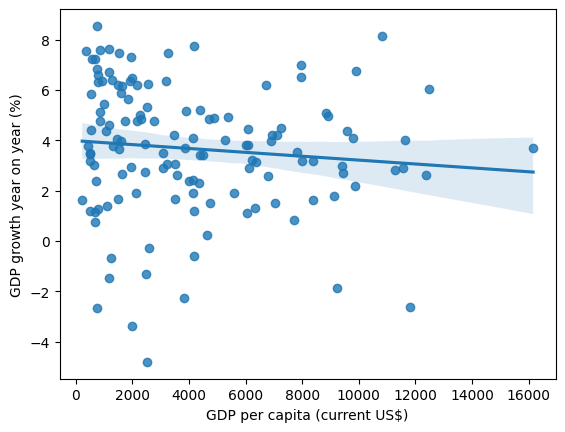

In [8]:
# sns.regplot(x='GNI per capita year on year (%)',y='GDP growth year on year (%)',data=df_ind)
# sns.regplot(x='GNI per capita year on year (%)',y='GDP per capita (current US$)',data=df_ind)
sns.regplot(x='GDP per capita (current US$)',y='GDP growth year on year (%)',data=df_indicators)

Compare the values from all the categories (or a select few) from two different countries

In [9]:
# Function to extract data for a country
def split_data_up(country_code, selection):
    with open(f'./countries_data/{country_code}') as f:
        total_data = json.load(f)

    years = []
    categories_and_values = {}

    # To get all the categories leave the selection as an empty array
    if selection == []:
        for data in total_data:
            temp_values = []
            for year, value in data.items():
                if year == 'Category': continue
                if year not in years: years.append(year)
                temp_values.append(float(value) if value != '' else 0)
            categories_and_values[data['Category']] = temp_values       
    else:
        for data in total_data:
            if data['Category'] not in selection: continue
            temp_values = []
            for year, value in data.items():
                if year == 'Category': continue
                if year not in years: years.append(year)
                temp_values.append(float(value) if value != '' else 0)
            categories_and_values[data['Category']] = temp_values

    return [years,categories_and_values,country_code]

In [19]:
def get_data_for_year(all_country_codes,year):
    year_data = {}
    for country in all_country_codes:
        country_year_data = {}
        with open(f'./countries_data/{country}') as f:
           country_data = json.load(f)
        for data_category in country_data:
            country_year_data[data_category['Category']] = data_category[str(year)]
        year_data[country] = country_year_data
    return {year:year_data}

years_data = {}
for i in range(21):
    years_data |= get_data_for_year(country_codes,(i+2000))

rearranged_years_data = {}
for year in years_data:
    year_total_data = years_data[year]
    all_categories = {}
    for country_code in year_total_data:
        country_data = year_total_data[country_code]
        for data_category in country_data:
            if country_code == country_codes[0]: all_categories[data_category] = []
            all_categories[data_category].append(country_data[data_category])
    rearranged_years_data[year] = all_categories
# print(rearranged_years_data)
temp_country_codes = country_codes
temp_data = []
temp_column_names = []
for temp_category in rearranged_years_data[2000]:
    temp_column_names.append(temp_category)
    temp_data.append(rearranged_years_data[2000][temp_category])

df_categories = pd.DataFrame(np.array(temp_data),index=temp_column_names,columns=temp_country_codes).T

df_categories


,Average grace period on new external debt commitments (years),Average grant element on new external debt commitments (%),Average maturity on new external debt commitments (years),Concessional debt (% of total external debt),Current account balance (current US$),"Exports of goods, services and primary income (current US$)","External debt stocks (% of exports of goods, services and primary income)",External debt stocks (% of GNI),"External debt stocks, long-term (DOD, current US$)","External debt stocks, short-term (DOD, current US$)",...,"Interest payments on external debt, public sector (PPG) (INT, current US$)","Interest payments on external debt, short-term (INT, current US$)","Interest payments on external debt, total (INT, current US$)",Short-term debt (% of total external debt),Total change in external debt stocks (current US$),"Total debt service (% of exports of goods, services and primary income)",Total reserves (% of total external debt),"Total reserves (includes gold, current US$)","Use of IMF credit (DOD, current US$)","Use of IMF credit, SDR allocations (DOD, current US$)"
AFG,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
ALB,10.5454,25.7609,29.7251,44.5588,-156300000,670400000,167.3704092,31.2833673,936960202.7,36665780.4,...,7365455.7,1607000,13610194.2,3.2677,348958322.7,4.478135531,54.86802416,615647336.3,148425240.2,60520508.3
DZA,3.017,-6.3631,11.281,1.936,9142000000,nan,nan,48.88907596,23353958639,222144000,...,1547484381,10430000,1662184889,0.8724,-2741912627,nan,47.2236543,12023903987,1885510115,167606342.4
AGO,1.6353,2.0905,4.4946,3.3831,795650000,8222360000,118.7428617,131.0749122,8084844148,1322915748,...,149427202.3,25700000,190760531,13.5496,-909776306,20.92943765,12.27240845,1198212373,355705668.9,355705668.9
ARG,11.4854,-43.384,11.7061,0.2336,-8980617893,38657070743,388.1901171,54.24170994,1.16267E+11,28325319330,...,7889318920,1731906000,11881419664,18.8756,-1850872524,64.28238673,16.75757164,25146902694,5470438316,414807456.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VEN,2.7301,-9.0212,19.8876,0.0493,11853000000,37760000000,130.9807009,42.72954537,40656731260,8185991602,...,2278596040,467084000,3399700034,16.5512,464006382,19.08989726,26.46366699,13088483163,615589796.4,412879149.9
VNM,9.545,47.7873,36.1565,29.1556,1106000000,17481000000,73.45791456,38.68580904,11639842786,823146086.6,...,297583346.5,45253000,348211763,6.4102,-10487602611,7.471825151,26.6059009,3416511105,378189171.2,62094084.8
YEM,8.9144,52.0326,35.2387,60.2886,1336606191,4157704686,123.9244563,58.03066731,4109003208,688661201.4,...,45264750.1,35478000,92384876.8,13.3657,20144422.9,5.89149095,56.28923656,2900253901,354748517.3,37449542.1
ZMB,10.0788,57.2426,39.5788,41.6095,-662446600,891370000,651.9717074,168.7145323,4508221851,76268923,...,73307386.9,2590000,91782910.6,1.3123,-141569482.4,21.24305676,4.212767196,244824131.8,1226989434,88986147.2


In [11]:
# Combine indicator table and category table

dataframes = [df_indicators,df_categories.reindex(df_indicators.index)]

df_combined = pd.concat(dataframes,axis=1)

# df_combined

In [20]:
df_corr = df_combined.corr()

df_corr

,GNI per capita year on year (%),GDP growth year on year (%),GDP per capita (current US$),Average grace period on new external debt commitments (years),Average grant element on new external debt commitments (%),Average maturity on new external debt commitments (years),Concessional debt (% of total external debt),Current account balance (current US$),"Exports of goods, services and primary income (current US$)","External debt stocks (% of exports of goods, services and primary income)",...,"Interest payments on external debt, public sector (PPG) (INT, current US$)","Interest payments on external debt, short-term (INT, current US$)","Interest payments on external debt, total (INT, current US$)",Short-term debt (% of total external debt),Total change in external debt stocks (current US$),"Total debt service (% of exports of goods, services and primary income)",Total reserves (% of total external debt),"Total reserves (includes gold, current US$)","Use of IMF credit (DOD, current US$)","Use of IMF credit, SDR allocations (DOD, current US$)"
GNI per capita year on year (%),1.000000,0.798494,0.007835,0.035830,0.078488,0.103229,0.202210,0.110506,0.095658,-0.160184,...,0.052282,0.059679,0.050190,-0.180847,-0.106588,-0.235862,-0.026117,0.105630,0.078091,0.074522
GDP growth year on year (%),0.798494,1.000000,-0.103884,0.083768,0.213043,0.237165,0.320310,0.091175,0.082541,-0.025254,...,0.042824,0.048785,0.043091,-0.288935,-0.092034,-0.180019,0.014618,0.108743,0.067901,0.053384
GDP per capita (current US$),0.007835,-0.103884,1.000000,-0.042727,-0.611559,-0.396802,-0.566449,0.043295,0.165100,-0.422650,...,0.171349,0.202594,0.179241,0.162059,-0.148049,0.139172,0.128612,0.166330,0.132433,0.143672
Average grace period on new external debt commitments (years),0.035830,0.083768,-0.042727,1.000000,0.471104,0.749832,0.253232,-0.154709,-0.005183,0.267890,...,0.034272,0.033583,0.041012,-0.212072,-0.006595,0.161399,-0.177224,-0.006122,0.011330,-0.005443
Average grant element on new external debt commitments (%),0.078488,0.213043,-0.611559,0.471104,1.000000,0.827761,0.644730,-0.037262,-0.300679,0.399653,...,-0.297155,-0.311871,-0.295741,-0.275854,0.213763,-0.273205,-0.081924,-0.272137,-0.244469,-0.251455
Average maturity on new external debt commitments (years),0.103229,0.237165,-0.396802,0.749832,0.827761,1.000000,0.527961,-0.063205,-0.208754,0.444080,...,-0.176439,-0.186346,-0.167104,-0.312089,0.122083,-0.039510,-0.205849,-0.170592,-0.146949,-0.159454
Concessional debt (% of total external debt),0.202210,0.320310,-0.566449,0.253232,0.644730,0.527961,1.000000,-0.117720,-0.237556,0.411370,...,-0.228711,-0.236021,-0.223661,-0.447346,0.194260,-0.215969,-0.015300,-0.227603,-0.206495,-0.203986
Current account balance (current US$),0.110506,0.091175,0.043295,-0.154709,-0.037262,-0.063205,-0.117720,1.000000,0.385840,-0.097311,...,0.255346,0.284261,0.245041,0.022892,-0.481859,-0.254588,0.019483,0.415307,0.500881,0.513158
"Exports of goods, services and primary income (current US$)",0.095658,0.082541,0.165100,-0.005183,-0.300679,-0.208754,-0.237556,0.385840,1.000000,-0.112232,...,0.985077,0.988258,0.983627,0.071482,-0.942096,0.138031,-0.012832,0.988561,0.958192,0.920050
"External debt stocks (% of exports of goods, services and primary income)",-0.160184,-0.025254,-0.422650,0.267890,0.399653,0.444080,0.411370,-0.097311,-0.112232,1.000000,...,-0.098312,-0.104566,-0.097325,-0.188178,0.108444,0.431770,-0.138766,-0.111801,-0.097334,-0.101947


In [14]:
df_categories_array = []

for i in range(21):
    for temp_category in rearranged_years_data[2000+i]:
        temp_column_names.append(temp_category)
        temp_data.append(rearranged_years_data[2000+i][temp_category])

    df_categories2 = pd.DataFrame(np.array(temp_data),index=temp_column_names,columns=temp_country_codes).T 
    df_categories_array.append(df_categories2.corr().to_numpy())


In [15]:
i = 1
for year_array in df_categories_array:
    print(year_array[0])
    for categoryx in year_array:
        print(i)
        i+=1
    break

[ 1.00000000e+00  4.71104212e-01  7.49831547e-01  2.53232035e-01
 -1.54708595e-01 -5.18282441e-03  2.67889818e-01  9.62895908e-02
  2.85780093e-02  3.56411128e-02  3.19402620e-02  3.72835871e-02
  2.02521781e-02  1.99105215e-02  2.63003695e-03 -1.18417401e-01
  8.06725621e-02  3.42715027e-02  3.35832178e-02  4.10115012e-02
 -2.12071951e-01 -6.59486420e-03  1.61398882e-01 -1.77224360e-01
 -6.12221258e-03  1.13300988e-02 -5.44312772e-03  1.00000000e+00
  4.71104212e-01  7.49831547e-01  2.53232035e-01 -1.54708595e-01
 -5.18282441e-03  2.67889818e-01  9.62895908e-02  2.85780093e-02
  3.56411128e-02  3.19402620e-02  3.72835871e-02  2.02521781e-02
  1.99105215e-02  2.63003695e-03 -1.18417401e-01  8.06725621e-02
  3.42715027e-02  3.35832178e-02  4.10115012e-02 -2.12071951e-01
 -6.59486420e-03  1.61398882e-01 -1.77224360e-01 -6.12221258e-03
  1.13300988e-02 -5.44312772e-03  4.78040156e-01  3.37881055e-01
  5.05119447e-01  2.67804419e-01 -1.51011106e-01 -2.76566310e-04
  2.35020517e-01  7.76054

['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']


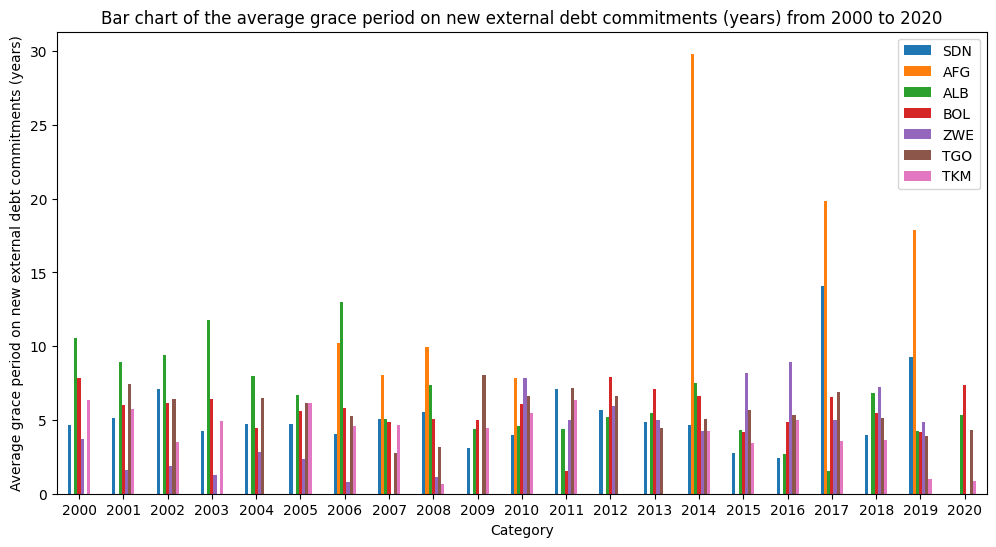

In [17]:
def get_barchart(countries):
    barchart_data = {}
    country1 = countries[0]
    countries_index = country1[0]
    print(countries_index)
    for category in country1[1]:
        for country in countries:  
            barchart_data[country[2]] = country[1][category]
            # break
            if country == countries[-1]:
                df = pd.DataFrame(barchart_data,index=countries_index)
                df.plot.bar(xlabel='Category',ylabel=category,rot=0, figsize=(12,6), title=f"Bar chart of the {category.lower()} from 2000 to 2020")
                barchart_data = {}
countries_codes = ['SDN','AFG','ALB','BOL','ZWE','TGO','TKM']
barchart_input = []
for country_code in countries_codes:
    input_value = split_data_up(country_code,['Average grace period on new external debt commitments (years)'])
    barchart_input.append(input_value)
get_barchart(barchart_input)